# Clone Essay-BR *corpus*


* https://github.com/rafaelanchieta/essay




In [1]:
import os
import pandas as pd
from tqdm import tqdm
from datetime import date
import numpy as np
import seaborn as sns

tqdm.pandas()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
DIRETORIO_COHEBERT = "data"

DIRETORIO_LOCAL = "/content/" + DIRETORIO_COHEBERT + "/"

# Diretório no google drive com os arquivos pré-processados
DIRETORIO_DRIVE = "/content/drive/MyDrive/Colab Notebooks/BERT_regressor/BERT_base_experimentos/" + DIRETORIO_COHEBERT

NOME_ARQUIVO_INPUT = 'bert_base_redacoes_cos_sim_texto_motivador_categoria.csv'

In [ ]:
import time
import datetime

# Marca o tempo de início do processamento
inicio_processamento = time.time()

In [ ]:
# Import das bibliotecas.
import logging # Biblioteca de logging

# Formatando a mensagem de logging
logging.basicConfig(format="%(asctime)s : %(levelname)s : %(message)s")

logger = logging.getLogger()
logger.setLevel(logging.INFO)

In [ ]:
! pip install sklearn
! pip install -U sentence-transformers
! python -m spacy download pt_core_news_sm

import nltk
nltk.download('punkt')

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 105.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 78.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 95.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 85.3 MB/s eta 0:

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df=pd.read_csv(f"{DIRETORIO_DRIVE}/{NOME_ARQUIVO_INPUT}")
df.sample(5)

,id,redacao,nota_competencia_2,nota_geral,tema,texto_motivador,categoria,sentencas_redacao,sentencas_texto_motivador,qtd_sentencas_redacao,...,len_texto_motivador,tokens_sentencas_redacao,tokens_sentencas_texto_motivador,tokens_sentencas_tema,avg_len_sentencas_redacao,avg_len_sentencas_texto_motivador,avg_bert_tokens_sentencas_texto_motivador,avg_bert_tokens_sentencas_redacao,cos_sim_last_hidden_layers,cos_sim_sentence_mean_pooled
409,1487,"muito se tem discutido recentemente, acerca da...",120,560,fome: um retrato da desigualdade social no brasil,a fome é a situação na qual a alimentação que ...,economia,"['muito se tem discutido recentemente, acerca ...",['a fome é a situação na qual a alimentação qu...,5,...,2026,"[['[CLS]', 'muito', 'se', 'tem', 'discu', '##t...","[['[CLS]', 'a', 'fome', 'é', 'a', 'situação', ...","['[CLS]', 'fome', ':', 'um', 'retrato', 'da', ...",198.200000,96.476190,21.666667,43.800000,0.848742,0.892571
1845,5735,"desde de quando foi descoberta, a aids( síndro...",120,520,a aids no mais a mesma? por que diminuiu o me...,"em 1989, quando o cantor cazuza assumiu estar ...",saúde,"['desde de quando foi descoberta, a aids( sínd...","['em 1989, quando o cantor cazuza assumiu esta...",8,...,1034,"[['[CLS]', 'desde', 'de', 'quando', 'foi', 'de...","[['[CLS]', 'em', '1989', ',', 'quando', 'o', '...","['[CLS]', 'a', 'a', '##ids', 'no', 'mais', 'a'...",193.625000,129.250000,32.250000,33.375000,0.636235,0.843996
2231,6139,o brasil não tem histórico de conflitos religi...,160,720,intolerncia religiosa: regra ou exceo no brasil?,"no ms de junho de 2015, no rio de janeiro, uma...",sociedade e cultura,['o brasil não tem histórico de conflitos reli...,"['no ms de junho de 2015, no rio de janeiro, u...",11,...,872,"[['[CLS]', 'o', 'bras', '##il', 'não', 'tem', ...","[['[CLS]', 'no', 'm', '##s', 'de', 'junho', 'd...","['[CLS]', 'into', '##ler', '##ncia', 'religios...",170.727273,109.000000,29.250000,33.636364,0.706072,0.811915
1751,5529,"na obra ""o alienista"" do grande escritor bras...",160,840,impactos do uso das redes sociais na saúde mental,"um impacto enorme, uma influência de grande pr...",saúde,"['na obra ""o alienista"" do grande escritor br...","['um impacto enorme, uma influência de grande ...",10,...,1690,"[['[CLS]', 'na', 'obra', '""', 'o', 'alien', '#...","[['[CLS]', 'um', 'impacto', 'enorme', ',', 'um...","['[CLS]', 'impactos', 'do', 'uso', 'das', 'red...",199.800000,169.000000,37.900000,47.200000,0.884173,0.940744
1713,5124,infelizmente o brasil esta entre os 10 países ...,120,640,conscientização da população para o isolamento...,texto 1: um estudo da universidade estadual de...,sociedade e cultura,['infelizmente o brasil esta entre os 10 paíse...,['texto 1: um estudo da universidade estadual ...,6,...,2242,"[['[CLS]', 'inf', '##elizmente', 'o', 'bras', ...","[['[CLS]', 'texto', '1', ':', 'um', 'estudo', ...","['[CLS]', 'consci', '##ent', '##ização', 'da',...",298.833333,186.833333,40.416667,62.000000,0.838889,0.912523


# Remove redações e textos motivadores com mais de 500 tokens

In [ ]:
df=df[(df.qtd_bert_texto_motivador <= 500) & (df.qtd_bert_tokens_redacao <= 500)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2653 entries, 38 to 6453
Data columns (total 24 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   id                                         2653 non-null   int64  
 1   redacao                                    2653 non-null   object 
 2   nota_competencia_2                         2653 non-null   int64  
 3   nota_geral                                 2653 non-null   int64  
 4   tema                                       2653 non-null   object 
 5   texto_motivador                            2653 non-null   object 
 6   categoria                                  2653 non-null   object 
 7   sentencas_redacao                          2653 non-null   object 
 8   sentencas_texto_motivador                  2653 non-null   object 
 9   qtd_sentencas_redacao                      2653 non-null   int64  
 10  qtd_sentencas_texto_mot

# Funcões Auxiliares e Classes


*   get_stop_words
*   sanitize_document
*   get_sentences
*   List item






In [ ]:
df.sample(5)

,id,redacao,nota_competencia_2,nota_geral,tema,texto_motivador,categoria,sentencas_redacao,sentencas_texto_motivador,qtd_sentencas_redacao,...,qtd_bert_texto_motivador,len_redacao,len_texto_motivador,tokens_sentencas_redacao,tokens_sentencas_texto_motivador,tokens_sentencas_tema,avg_len_sentencas_redacao,avg_len_sentencas_texto_motivador,avg_bert_tokens_sentencas_texto_motivador,avg_bert_tokens_sentencas_redacao
4950,5063,assim declarou o padre fábio de melo a respeit...,160,760,impactos do uso das redes sociais na saúde mental,"um impacto enorme, uma influência de grande pr...",saúde,['assim declarou o padre fábio de melo a respe...,"['um impacto enorme, uma influência de grande ...",6,...,361,2117,1690,"[['[CLS]', 'assim', 'declarou', 'o', 'padre', ...","[['[CLS]', 'um', 'impacto', 'enorme', ',', 'um...","['[CLS]', 'impactos', 'do', 'uso', 'das', 'red...",352.833333,169.000000,37.900000,78.166667
2900,2906,andar armado é um direito do cidadão? muita ge...,160,720,porte de armas pela população civil,"o presidente dos estados unidos, barack obama,...",segurança,"['andar armado é um direito do cidadão?', 'mui...","['o presidente dos estados unidos, barack obam...",7,...,207,951,915,"[['[CLS]', 'andar', 'armado', 'é', 'um', 'dire...","[['[CLS]', 'o', 'presidente', 'dos', 'estados'...","['[CLS]', 'porte', 'de', 'armas', 'pela', 'pop...",135.857143,183.000000,43.000000,31.857143
5895,6011,em um mundo que poderia até me...,160,680,vlido simplificar a linguagem de um clssico?,"em meados de 2014, uma polmica agitou os meios...",educação,['em um mundo que poderia até ...,"['em meados de 2014, uma polmica agitou os mei...",9,...,218,1782,943,"[['[CLS]', 'em', 'um', 'mundo', 'que', 'poderi...","[['[CLS]', 'em', 'meados', 'de', '2014', ',', ...","['[CLS]', 'v', '##li', '##do', 'simpl', '##ifi...",198.000000,117.875000,29.000000,36.333333
6444,6567,"conta-se que uma história, na ...",80,320,violncia escolar: expor o problema e sugerir s...,"a violncia na escola no um problema novo, mas...",educação,"['conta-se que uma história, n...","['a violncia na escola no um problema novo, m...",14,...,234,2237,956,"[['[CLS]', 'conta', '-', 'se', 'que', 'uma', '...","[['[CLS]', 'a', 'viol', '##ncia', 'na', 'escol...","['[CLS]', 'viol', '##ncia', 'escolar', ':', 'e...",159.785714,95.600000,25.200000,27.714286
791,793,"é evidente que, o povo brasileiro está insati...",120,440,reforma da previdência: uma solução ou um prob...,"reforma da previdência social, ou simplesmente...",sociedade e cultura,"['é evidente que, o povo brasileiro está insa...","['reforma da previdência social, ou simplesmen...",8,...,434,1025,1937,"[['[CLS]', 'é', 'evidente', 'que', ',', 'o', '...","[['[CLS]', 'reforma', 'da', 'prev', '##idência...","['[CLS]', 'reforma', 'da', 'prev', '##idência'...",128.125000,176.090909,41.272727,30.500000


In [ ]:
# Import das bibliotecas.
import torch # Biblioteca para manipular os tensores
from torch import tensor
torch.set_printoptions(profile="full")

def getDeviceGPU():
    """
    Retorna um dispositivo de GPU se disponível ou CPU.

    Retorno:
    `device` - Um device de GPU ou CPU.
    """

    # Se existe GPU disponível.
    if torch.cuda.is_available():

        # Diz ao PyTorch para usar GPU.
        device = torch.device("cuda")

        logging.info("Existem {} GPU(s) disponíveis.".format(torch.cuda.device_count()))
        logging.info("Iremos usar a GPU: {}.".format(torch.cuda.get_device_name(0)))

    # Se não.
    else:
        logging.info("Sem GPU disponível, usando CPU.")
        device = torch.device("cpu")


In [ ]:
!nvidia-smi

Wed Nov 15 19:01:05 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf

# Recupera o nome do dispositido da GPU.
device_name = tf.test.gpu_device_name()

# O nome do dispositivo deve ser parecido com o seguinte:
if device_name == "/device:GPU:0":
    logging.info("Encontrei GPU em: {}".format(device_name))
else:
    logging.info("Dispositivo GPU não encontrado")
    #raise SystemError("Dispositivo GPU não encontrado")

INFO:root:Encontrei GPU em: /device:GPU:0


In [ ]:
# Import das bibliotecas.
import sys # Biblioteca para acessar módulos do sistema

# Se estiver executando no Google Colaboratory
# Retorna true ou false se estiver no Google Colaboratory
IN_COLAB = "google.colab" in sys.modules

In [ ]:
def conectaGPU(model, device):
    """
      Conecta um modelo BERT a GPU.

      Parâmetros:
        `model` - Um modelo BERT carregado.
        `device` - Um device de GPU.

      Retorno:
        `model` - Um objeto model BERT conectado a GPU.
    """
    # Associa a GPU ao modelo.
    model.to(device)

    # Se existe GPU disponível.
    if torch.cuda.is_available():
        # Diga ao pytorch para rodar este modelo na GPU.
        logging.info("Pytorch rodando o modelo na GPU.")
        model.cuda()

    else:
        logging.info("Pytorch rodando sem GPU.")

    return model

In [ ]:
import spacy
from sklearn.metrics.pairwise import cosine_similarity

gpu = spacy.prefer_gpu()
print('GPU:', gpu)

nlp = spacy.load("pt_core_news_sm")

GPU: True


In [ ]:
from transformers import AutoTokenizer, AutoModel

model_name = "neuralmind/bert-base-portuguese-cased"

# from sentence_transformers import SentenceTransformer
# sentence_model = SentenceTransformer(model_name, device="cuda")

# Load the pre-trained BERT model and tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name).to('cuda')


In [ ]:
sent = "Se houver um novo entendimento do STF, a prisão só poderá ocorrer depois do esgotamento das possibilidades de recurso no superior tribunal de justiça e, a seguir, no próprio supremo, que funcionariam como 3ª. e 4ª. instâncias."

# encoded_sent = tokenizer.encode_plus(
#     sent,
#     add_special_tokens = True,
#     max_length = 512,
#     padding='max_length',
#     return_attention_mask = True,
#     return_tensors = 'pt'
# )
print(f"Original: {sent}")
print(f"Tokens: {tokenizer.tokenize(sent)}")
print(f"Tokeni IDs: {tokenizer(sent)['input_ids']}")
print(f"Tokenized: {tokenizer(sent)['attention_mask']}")

Original: Se houver um novo entendimento do STF, a prisão só poderá ocorrer depois do esgotamento das possibilidades de recurso no superior tribunal de justiça e, a seguir, no próprio supremo, que funcionariam como 3ª. e 4ª. instâncias.
Tokens: ['Se', 'houver', 'um', 'novo', 'entendimento', 'do', 'ST', '##F', ',', 'a', 'prisão', 'só', 'poderá', 'ocorrer', 'depois', 'do', 'esgo', '##tamento', 'das', 'possibilidades', 'de', 'recurso', 'no', 'superior', 'tribunal', 'de', 'justiça', 'e', ',', 'a', 'seguir', ',', 'no', 'próprio', 'supremo', ',', 'que', 'funcionar', '##iam', 'como', '[UNK]', '.', 'e', '[UNK]', '.', 'instância', '##s', '.']
Tokeni IDs: [101, 530, 20075, 222, 1160, 12884, 171, 13196, 22324, 117, 123, 4025, 1203, 8209, 7736, 700, 171, 8633, 1869, 366, 12522, 125, 8190, 202, 2886, 9497, 125, 6722, 122, 117, 123, 3866, 117, 202, 1946, 21688, 117, 179, 11331, 923, 271, 100, 119, 122, 100, 119, 17231, 22281, 119, 102]
Tokenized: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [ ]:
################################################################################################################################################
# O método abaixo é uma tentativa de implementar o pooling de frases usando BERT, porém isso é inviável computacionalmente.
# a partir de uma estimativa aproximada, levaria cerca de 165 horas para calcular semelhanças para 2.600 ensaios e seus textos auxiliares.
################################################################################################################################################
# def get_cos_sim_redacao_texto_motivador_sentenciados(redacao_sents, texto_motivador_sents):

#   redacao_sentences_embeddings = [get_embeddings(sent) for sent in redacao_sents]
#   texto_motivador_sentences_embeddings = [get_embeddings(sent) for sent in texto_motivador_sents]

#   redacao_mean_pooled_embeedings = np.mean(redacao_sentences_embeddings, axis=0)
#   texto_motivador_mean_pooled_embeddings = np.mean(texto_motivador_sentences_embeddings, axis=0)

#   return cosine_similarity(redacao_mean_pooled_embeedings, texto_motivador_mean_pooled_embeddings)[0][0]

def get_sbert_embeddings(texto):

  inputs = tokenizer(texto, return_tensors="pt", padding=True, truncation=True)
  outputs = model(**inputs)

  embeddings = outputs.last_hidden_state[:, 0, :].detach().numpy()

  return embeddings

def get_cos_sim_redacao_texto_motivador(texto):
  return sentence_model.encode(texto, show_progress_bar=False)


def get_cos_sim_redacao_texto_motivador_from_sentence_transformers(redacao_sents, texto_motivador_sents):
  redacao_sentences_embeddings = sentence_model.encode(redacao_sents, show_progress_bar=False)
  texto_motivador_sentences_embeddings = sentence_model.encode(texto_motivador_sents, show_progress_bar=False)
  redacao_mean_pooled_embeedings = [np.mean(redacao_sentences_embeddings, axis=0)]
  texto_motivador_mean_pooled_embeddings = [np.mean(texto_motivador_sentences_embeddings, axis=0)]

  return cosine_similarity(redacao_mean_pooled_embeedings, texto_motivador_mean_pooled_embeddings)[0][0]

def get_bert_max_pooling_pytorch_tensors(texto):

    inputs = tokenizer(texto, return_tensors="pt", padding=True, truncation=True)
    outputs = model(**inputs)

    # Applying max pooling over the sequence length (axis 1)
    max_pooled_output = torch.max(outputs.last_hidden_state, dim=1)[0]

    return max_pooled_output.detach()

def get_bert_mean_pooling_pytorch_tensors(texto):

    inputs = tokenizer(texto, return_tensors="pt", padding=True, truncation=True)
    outputs = model(**inputs)

    mean_pooled = outputs.last_hidden_state.mean(dim=1)

    return mean_pooled.detach()

def get_mean_pooled_embeddings(texto):
    inputs = tokenizer(texto, return_tensors="pt", padding=True, truncation=True, max_length=512)
    outputs = model(**inputs)

    # Mask padded values
    mask = inputs['attention_mask']
    sum_embeddings = torch.sum(outputs.last_hidden_state * mask.unsqueeze(-1), dim=1)
    mean_pooled = sum_embeddings / mask.sum(dim=1, keepdim=True)

    return mean_pooled.detach().numpy()

def get_bert_non_padded_mean_pooling_pytorch_tensors(texto):
    non_padded_embeddings = get_non_padded_bert_embeddings(texto)
    mean_pooled = non_padded_embeddings.mean(dim=0).unsqueeze(0)
    return mean_pooled.detach()

def get_bert_non_padded_max_pooling_pytorch_tensors(texto):
    embeddings = get_non_padded_bert_embeddings(texto)
    max_pooled = torch.max(embeddings, dim=0)[0].unsqueeze(0)
    return  max_pooled.detach()

def get_non_padded_bert_embeddings(texto):

    inputs = tokenizer(texto, return_tensors="pt", padding=True, truncation=True)
    outputs = model(**inputs)

    # Mask the embeddings to consider only non-padded tokens
    # The mask will have 1s where there's a token, and 0s where there's padding.
    mask = inputs["attention_mask"].unsqueeze(-1).expand(outputs.last_hidden_state.size())

    # Use the mask to extract embeddings of non-padded tokens
    non_padded_embeddings = outputs.last_hidden_state[mask.bool()].view(-1, outputs.last_hidden_state.size(-1))

    return non_padded_embeddings.detach()

def get_cosine_similarity_between_embeddings_vectors(emb1, emb2):
    return cosine_similarity(emb1, emb2)[0][0]


In [ ]:
device = getDeviceGPU()
model = conectaGPU(model, device)

INFO:root:Existem 1 GPU(s) disponíveis.
INFO:root:Iremos usar a GPU: Tesla T4.
INFO:root:Pytorch rodando o modelo na GPU.


# BERT Gera similaridade por cosseno entre redaçãoes e seus respectivos textos motivadores [textos na íntegra]

In [ ]:
df['cos_sim_last_hidden_layers']=df.progress_apply(lambda row: get_cosine_similarity_between_embeddings_vectors(get_non_padded_bert_embeddings(row['redacao']), get_non_padded_bert_embeddings(row['texto_motivador'])), axis=1)

100%|██████████| 2653/2653 [27:28<00:00,  1.61it/s]


# SBERT Gera similaridade por cosseno entre redaçãoes e seus respectivos textos motivadores [textos sentenciados]

In [ ]:
df['cos_sim_sentence_mean_pooled']=df.progress_apply(lambda row: get_cos_sim_redacao_texto_motivador_from_sentence_transformers(eval(row['sentencas_redacao']), eval(row['sentencas_texto_motivador'])), axis=1)

100%|██████████| 2653/2653 [04:04<00:00, 10.84it/s]


In [ ]:
df.sample(5)

,id,redacao,nota_competencia_2,nota_geral,tema,texto_motivador,categoria,sentencas_redacao,sentencas_texto_motivador,qtd_sentencas_redacao,...,len_texto_motivador,tokens_sentencas_redacao,tokens_sentencas_texto_motivador,tokens_sentencas_tema,avg_len_sentencas_redacao,avg_len_sentencas_texto_motivador,avg_bert_tokens_sentencas_texto_motivador,avg_bert_tokens_sentencas_redacao,cos_sim_last_hidden_layers,cos_sim_sentence_mean_pooled
3759,3799,"o ultrarromantismo, corrente literária do sécu...",160,760,o suicídio entre os jovens: como resolver esse...,o suicídio pode ser causado por vários fatores...,saúde,"['o ultrarromantismo, corrente literária do sé...",['o suicídio pode ser causado por vários fator...,11,...,1831,"[['[CLS]', 'o', 'ultra', '##r', '##roma', '##n...","[['[CLS]', 'o', 'suicídio', 'pode', 'ser', 'ca...","['[CLS]', 'o', 'suicídio', 'entre', 'os', 'jov...",201.545455,152.583333,35.000000,44.727273,0.848859,0.943267
1615,1617,as tragédias ambientais infelizmente vem destr...,120,560,quais as soluções para os impactos ambientais ...,segundo a resolução conama nº001 de janeiro de...,meio ambiente,['as tragédias ambientais infelizmente vem des...,['segundo a resolução conama nº001 de janeiro ...,2,...,1774,"[['[CLS]', 'as', 'tragédia', '##s', 'ambientai...","[['[CLS]', 'segundo', 'a', 'resolução', 'con',...","['[CLS]', 'quais', 'as', 'soluções', 'para', '...",809.000000,147.833333,34.833333,167.500000,0.811762,0.854578
5698,5812,a água é um bem fundamental para ...,120,400,gua: aprenderemos com a atual crise hdrica?,"h cerca de duas dcadas, os ambientalistas tm a...",meio ambiente,['a água é um bem fundamental para ...,"['h cerca de duas dcadas, os ambientalistas tm...",9,...,993,"[['[CLS]', 'a', 'água', 'é', 'um', 'bem', 'fun...","[['[CLS]', 'h', 'cerca', 'de', 'duas', 'd', '#...","['[CLS]', 'gu', '##a', ':', 'aprender', '##emo...",139.555556,141.857143,37.142857,27.777778,0.544630,0.788719
3514,3546,"a ciência, desde o final de 2019, tem ganhado ...",160,720,coronavírus: a importância da ciência para a s...,uma pandemia (do grego παν pan = tudo/ todo(s)...,saúde,"['a ciência, desde o final de 2019, tem ganhad...",['uma pandemia (do grego παν pan = tudo/ todo(...,6,...,1967,"[['[CLS]', 'a', 'ciência', ',', 'desde', 'o', ...","[['[CLS]', 'uma', 'pan', '##dem', '##ia', '(',...","['[CLS]', 'coro', '##na', '##v', '##ír', '##us...",342.833333,178.818182,42.636364,68.166667,0.812912,0.891728
6287,6407,os movimentos populares têm sido ...,200,920,por que causas o jovem tem se mobilizado atual...,as novas tecnologias ampliaram muito a capacid...,política,['os movimentos populares têm sido ...,['as novas tecnologias ampliaram muito a capac...,10,...,1237,"[['[CLS]', 'os', 'movimentos', 'populares', 't...","[['[CLS]', 'as', 'novas', 'tecnologias', 'ampl...","['[CLS]', 'por', 'que', 'causas', 'o', 'jovem'...",272.800000,137.444444,32.555556,48.600000,0.742140,0.881086


# Correlação entre a similaridade do cosseno entre redações e textos motivadores inteiros (BERT Embeddings gerados apartir do [CLS] token)

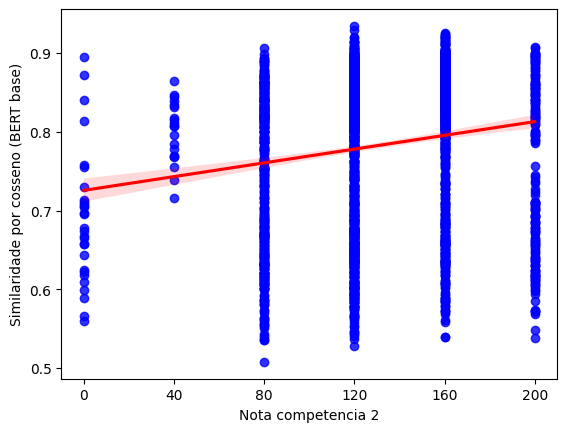

In [19]:
import matplotlib.pyplot as plt

ax = sns.regplot(x="nota_competencia_2", y="cos_sim_last_hidden_layers", data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
ax.set(xlabel="Nota competencia 2", ylabel="Similaridade por cosseno (BERT base)")
ax.set_xticks(np.arange(0, 201, 40))
plt.show()

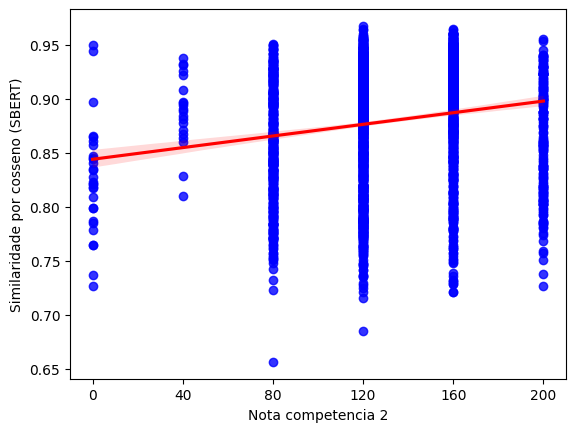

In [20]:
ax = sns.regplot(x="nota_competencia_2", y="cos_sim_sentence_mean_pooled", data=df, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
ax.set(xlabel="Nota competencia 2", ylabel="Similaridade por cosseno (SBERT)")
ax.set_xticks(np.arange(0, 201, 40))
plt.show()

In [ ]:
corr = df[['nota_competencia_2', 'cos_sim_last_hidden_layers']].corr()
corr.style.background_gradient(cmap='coolwarm')

,nota_competencia_2,cos_sim_last_hidden_layers
nota_competencia_2,1.000000,0.159720
cos_sim_last_hidden_layers,0.159720,1.000000


<Axes: xlabel='nota_competencia_2', ylabel='cos_sim_last_hidden_layers'>

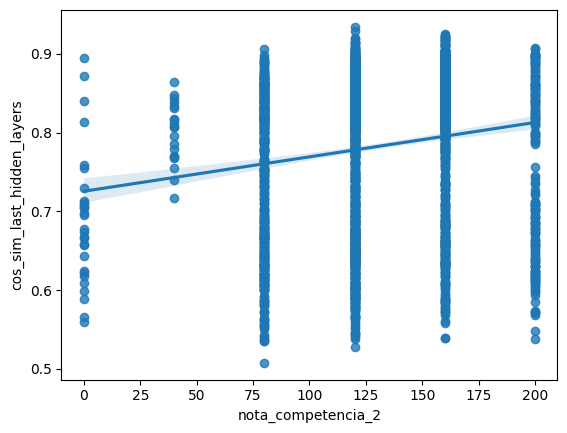

In [ ]:
sns.regplot(x=df['nota_competencia_2'], y=df['cos_sim_last_hidden_layers'])

# Correlação entre a similaridade do cosseno entre redações e textos motivadores inteiros (SBERT)

In [ ]:
corr = df[['nota_competencia_2', 'cos_sim_sentence_mean_pooled']].corr()
corr.style.background_gradient(cmap='coolwarm')

,nota_competencia_2,cos_sim_sentence_mean_pooled
nota_competencia_2,1.000000,0.178405
cos_sim_sentence_mean_pooled,0.178405,1.000000


<Axes: xlabel='nota_competencia_2', ylabel='cos_sim_sentence_mean_pooled'>

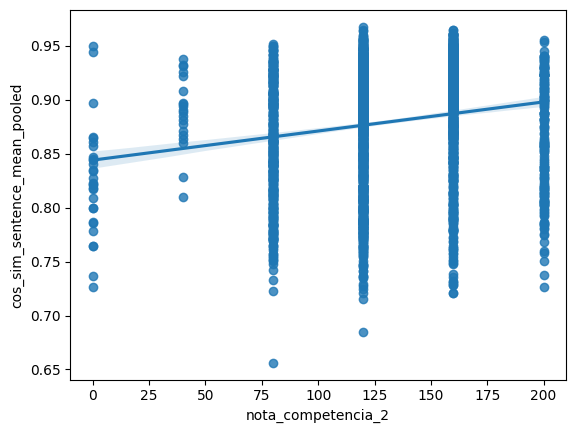

In [ ]:
sns.regplot(x=df['nota_competencia_2'], y=df['cos_sim_sentence_mean_pooled'])

# Salva dataset

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2653 entries, 0 to 2652
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   id                                         2653 non-null   int64  
 1   redacao                                    2653 non-null   object 
 2   nota_competencia_2                         2653 non-null   int64  
 3   nota_geral                                 2653 non-null   int64  
 4   tema                                       2653 non-null   object 
 5   texto_motivador                            2653 non-null   object 
 6   categoria                                  2653 non-null   object 
 7   sentencas_redacao                          2653 non-null   object 
 8   sentencas_texto_motivador                  2653 non-null   object 
 9   qtd_sentencas_redacao                      2653 non-null   int64  
 10  qtd_sentencas_texto_moti

In [ ]:
df.to_csv(f"{DIRETORIO_DRIVE}/bert_base_redacoes_cos_sim_texto_motivador_categoria.csv", index=False)

In [4]:
df=pd.read_csv(f"{DIRETORIO_DRIVE}/bert_base_redacoes_cos_sim_texto_motivador_categoria.csv")
df.head(5)

,id,redacao,nota_competencia_2,nota_geral,tema,texto_motivador,categoria,sentencas_redacao,sentencas_texto_motivador,qtd_sentencas_redacao,...,len_texto_motivador,tokens_sentencas_redacao,tokens_sentencas_texto_motivador,tokens_sentencas_tema,avg_len_sentencas_redacao,avg_len_sentencas_texto_motivador,avg_bert_tokens_sentencas_texto_motivador,avg_bert_tokens_sentencas_redacao,cos_sim_last_hidden_layers,cos_sim_sentence_mean_pooled
0,38,no que se refere aos avanços tecnológicos no b...,0,0,qualificação e o futuro do emprego,o número de pessoas desempregadas no mundo dev...,economia,['no que se refere aos avanços tecnológicos no...,['o número de pessoas desempregadas no mundo d...,3,...,1971,"[['[CLS]', 'no', 'que', 'se', 'refere', 'aos',...","[['[CLS]', 'o', 'número', 'de', 'pessoas', 'de...","['[CLS]', 'qualificação', 'e', 'o', 'futuro', ...",288.333333,164.250000,36.166667,57.666667,0.755324,0.833789
1,55,"no brasil colônia, assim como hoje, a corrupçã...",0,0,reforma do ensino médio - uma solução ou um pr...,"""um dos principais objetivos da nova proposta ...",educação,"['no brasil colônia,', 'assim como hoje, a cor...","['""um dos principais objetivos da nova propost...",5,...,1969,"[['[CLS]', 'no', 'bras', '##il', 'colônia', ',...","[['[CLS]', '""', 'um', 'dos', 'principais', 'ob...","['[CLS]', 'reforma', 'do', 'ensino', 'médio', ...",271.400000,115.823529,24.941176,59.600000,0.713577,0.864766
2,58,se torna cada vez mais comum o consumo de álco...,0,0,projeto de lei de iniciativa popular,"""de acordo com constituição federal, o brasil ...",política,['se torna cada vez mais comum o consumo de ál...,"['""', 'de acordo com constituição federal, o b...",5,...,1562,"[['[CLS]', 'se', 'torna', 'cada', 'vez', 'mais...","[['[CLS]', '""', '[SEP]'], ['[CLS]', 'de', 'aco...","['[CLS]', 'projeto', 'de', 'lei', 'de', 'inici...",239.200000,142.000000,34.636364,52.200000,0.624578,0.785383
3,60,"frequentemente ouve-se falar de estupro, crime...",0,0,projeto de lei de iniciativa popular,"""de acordo com constituição federal, o brasil ...",política,"['frequentemente ouve-se falar de estupro, cri...","['""', 'de acordo com constituição federal, o b...",10,...,1562,"[['[CLS]', 'frequentemente', 'ouve', '-', 'se'...","[['[CLS]', '""', '[SEP]'], ['[CLS]', 'de', 'aco...","['[CLS]', 'projeto', 'de', 'lei', 'de', 'inici...",156.500000,142.000000,34.636364,35.400000,0.705956,0.834608
4,63,"vê-se, através dos veículos de mídia, que os a...",0,0,projeto de lei de iniciativa popular,"""de acordo com constituição federal, o brasil ...",política,"['vê-se, através dos veículos de mídia, que os...","['""', 'de acordo com constituição federal, o b...",4,...,1562,"[['[CLS]', 'vê', '-', 'se', ',', 'através', 'd...","[['[CLS]', '""', '[SEP]'], ['[CLS]', 'de', 'aco...","['[CLS]', 'projeto', 'de', 'lei', 'de', 'inici...",253.750000,142.000000,34.636364,56.000000,0.707835,0.821017
